In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [29]:
d_price = 0.001
prices = np.arange(160, 320, d_price)  # reserve price

a = 1 / ((200 - 160) + (320 - 250))

pdf = []
for p in prices:
    if 160 <= p <= 200 or 250 <= p <= 320:
        pdf.append(a)
    else:
        pdf.append(0)

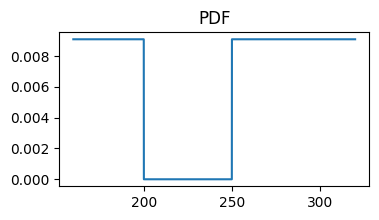

In [30]:
plt.figure(figsize=(4, 2))
plt.plot(prices, pdf)
plt.title('PDF')
plt.show()

In [25]:
cdf = []
for p in prices:
    if 160 <= p <= 200:
        cdf.append(a * (p - 160))
    elif 200 <= p <= 250:
        cdf.append(a * 40)
    elif 250 <= p <= 320:
        cdf.append(a * (p - 250) + a * 40)
    else:
        cdf.append(0)
cdf = np.array(cdf)

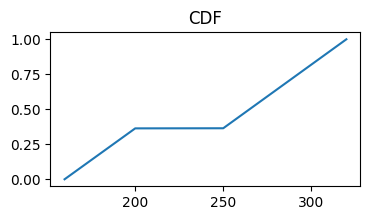

In [26]:
plt.figure(figsize=(4, 2))
plt.plot(prices, cdf)
plt.title('CDF')
plt.show()

In [46]:
def calc_cdf(p, a=a):
    if p <= 160:
        return 0
    elif 160 <= p <= 200:
        return a * (p - 160)
    elif 200 <= p <= 250:
        return a * 40
    elif 250 <= p <= 320:
        return a * (p - 250) + a * 40
    else:
        return 1

In [64]:
def calc_expected_profit(bid1, bid2):
    return (320 - bid1) * calc_cdf(bid1) + (320 - bid2) * (calc_cdf(bid2) - calc_cdf(bid1))

In [65]:
profits = {}
for bid1 in np.arange(160, 320):
    for bid2 in np.arange(bid1, 320):
        profit = calc_expected_profit(bid1, bid2)
        profits[(bid1, bid2)] = profit

max_profit = max(profits.values())
best_bids = [k for k, v in profits.items() if v == max_profit]
print(f'Bid 1: {best_bids[0][0]}, Bid 2: {best_bids[0][1]}, profit: {max_profit}')

Bid 1: 200, Bid 2: 285, profit: 54.77272727272728


In [100]:
for avg in range(285, 300):
    print(320 - avg, ((320 - avg) / (320 - 285)) ** 3 * (320 - 285))

35 35.0
34 32.08489795918367
33 29.336326530612244
32 26.74938775510204
31 24.319183673469382
30 22.04081632653061
29 19.909387755102046
28 17.920000000000005
27 16.067755102040817
26 14.347755102040818
25 12.755102040816327
24 11.284897959183674
23 9.932244897959183
22 8.692244897959183
21 7.559999999999999


In [101]:
for avg in range(285, 300):
    print(320 - avg - ((320 - avg) / (320 - 285)) ** 3 * (320 - 285))

0.0
1.915102040816329
3.6636734693877564
5.250612244897962
6.680816326530618
7.95918367346939
9.090612244897954
10.079999999999995
10.932244897959183
11.652244897959182
12.244897959183673
12.715102040816326
13.067755102040817
13.307755102040817
13.440000000000001


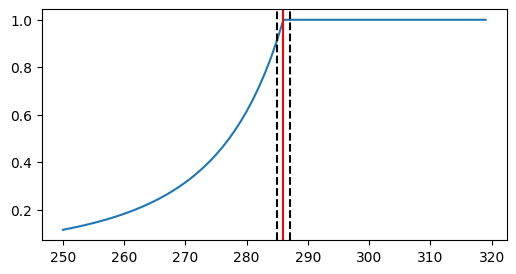

In [97]:
lis = []
avg = 286
for bid2 in range(250, 320):
    avg_ratio = ((320 - avg) / (320 - bid2)) ** 3
    if bid2 < avg:
        lis.append(avg_ratio)
    else:
        lis.append(1)

plt.figure(figsize=(6, 3))
plt.plot(range(250, 320), lis)
plt.axvline(avg, c='r')
plt.axvline(avg + 1, c='k', linestyle = 'dashed')
plt.axvline(avg - 1, c='k', linestyle = 'dashed')
plt.show()

In [67]:
def calc_expected_profit_avg(bid1, bid2, avg):
    if bid2 > avg:
        return (320 - bid1) * calc_cdf(bid1) + (320 - bid2) * (calc_cdf(bid2) - calc_cdf(bid1))
    else:
        avg_ratio = ((320 - avg) / (320 - bid2)) ** 3
        return (320 - bid1) * calc_cdf(bid1) + (320 - bid2) * (calc_cdf(bid2) - calc_cdf(bid1)) * avg_ratio

In [86]:
opt_b2 = {}
for avg in range(250, 320):
    profits = {}
    for bid1 in np.arange(160, 320):
        for bid2 in np.arange(bid1, 320):
            profit = calc_expected_profit_avg(bid1, bid2, avg)
            profits[(bid1, bid2)] = profit
    
    max_profit = max(profits.values())
    best_bids = [k for k, v in profits.items() if v == max_profit][0]
    opt_b2[avg] = best_bids[1]

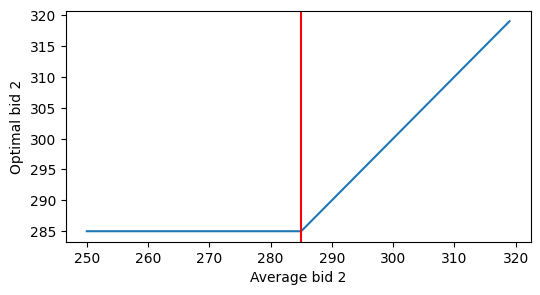

In [87]:
plt.figure(figsize=(6, 3))
plt.plot(opt_b2.keys(), opt_b2.values())
plt.axvline(285, c='r')
plt.xlabel('Average bid 2')
plt.ylabel('Optimal bid 2')
plt.show()